# Tugas
- Lakukan klasifikasi pada data MNIST dengan menggunakan model ANN
- Anda diperbolehkan melakukan eksplorasi terhadap,
 - Metode pra pengolahan
 - Pemilihan fitur
 - Arsitektur ANN
 - Fungsi Aktiviasi
- ANN diimplementasikan dengan menggunakan tensorflow.
- **DIKERJAKAN SECARA BERKELOMPOK**
- **JELASKAN HASIL YANG ANDA DAPATKAN,**
 - **AKURASI**
 - **CONFUSION MATRIX**
 - **KONFIGURASI MODEL --> MULAI DARI PRA PENGOLAHAN SAMPAI ARSITEKTUR ANN**

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

## Load data MNIST

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0

##  Menghitung jumlah data pada setiap label dalam data pelatihan (y_train) dan data pengujian (y_test)

In [ ]:
from collections import Counter

# Count the number of data for each label in the training set
label_counts = Counter(y_train)

# Sort the counts by label
sorted_label_counts = sorted(label_counts.items(), key=lambda x: x[0])

# Print the counts for each label in order
for label, count in sorted_label_counts:
    print(f"Label {label}: {count} data")

# Optionally, you can do the same for the test set
test_label_counts = Counter(y_test)
sorted_test_label_counts = sorted(test_label_counts.items(), key=lambda x: x[0])
for label, count in sorted_test_label_counts:
    print(f"Label {label}: {count} data (Test set)")

Label 0: 5923 data
Label 1: 6742 data
Label 2: 5958 data
Label 3: 6131 data
Label 4: 5842 data
Label 5: 5421 data
Label 6: 5918 data
Label 7: 6265 data
Label 8: 5851 data
Label 9: 5949 data
Label 0: 980 data (Test set)
Label 1: 1135 data (Test set)
Label 2: 1032 data (Test set)
Label 3: 1010 data (Test set)
Label 4: 982 data (Test set)
Label 5: 892 data (Test set)
Label 6: 958 data (Test set)
Label 7: 1028 data (Test set)
Label 8: 974 data (Test set)
Label 9: 1009 data (Test set)


## Pra-pemrosesan data

In [ ]:
# Flatten the images for PCA
x_train_flat = x_train.reshape(-1, 784)
x_test_flat = x_test.reshape(-1, 784)

## Ekstraksi data dengan PCA

In [ ]:
# Perform PCA to reduce dimensionality
n_components = 200  # Adjusted the number to match the encoding dimension
pca = PCA(n_components=n_components)
x_train_pca = pca.fit_transform(x_train_flat)
x_test_pca = pca.transform(x_test_flat)

## Encoding Data dengan Autoencoder



In [ ]:
# Define the Autoencoder for encoding
autoencoder = models.Sequential([
    layers.Input(shape=(784,)),  # Input dimension matches the data
    layers.Dense(128, activation='relu'),
    layers.Dense(n_components, activation='relu')  # Output dimension matches the encoding dimension
])

autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train the Autoencoder
autoencoder.fit(x_train_flat, x_train_pca, epochs=10, batch_size=256, shuffle=True)

# Get the encoded representations
encoded_train = autoencoder.predict(x_train_flat)
encoded_test = autoencoder.predict(x_test_flat)

Epoch 1/10
235/235 [==============================] - 2s 7ms/step - loss: 0.1752
Epoch 2/10
235/235 [==============================] - 2s 10ms/step - loss: 0.1523
Epoch 3/10
235/235 [==============================] - 2s 8ms/step - loss: 0.1491
Epoch 4/10
235/235 [==============================] - 2s 7ms/step - loss: 0.1482
Epoch 5/10
235/235 [==============================] - 2s 7ms/step - loss: 0.1478
Epoch 6/10
235/235 [==============================] - 2s 6ms/step - loss: 0.1477
Epoch 7/10
235/235 [==============================] - 1s 6ms/step - loss: 0.1477
Epoch 8/10
235/235 [==============================] - 2s 7ms/step - loss: 0.1477
Epoch 9/10
235/235 [==============================] - 2s 6ms/step - loss: 0.1477
Epoch 10/10
313/313 [==============================] - 1s 2ms/step


## Membuat model ANN

In [ ]:
# Define the ANN for classification
model = models.Sequential([
    layers.Input(shape=(n_components,)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Training model

## Compile model

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

## Fitting model

In [ ]:
# Train the ANN
model.fit(encoded_train, y_train, epochs=10, batch_size=256, validation_data=(encoded_test, y_test))

Epoch 1/10
235/235 [==============================] - 2s 5ms/step - loss: 0.8271 - accuracy: 0.7635 - val_loss: 0.4558 - val_accuracy: 0.8634
Epoch 2/10
235/235 [==============================] - 1s 5ms/step - loss: 0.4219 - accuracy: 0.8731 - val_loss: 0.3552 - val_accuracy: 0.8905
Epoch 3/10
235/235 [==============================] - 1s 6ms/step - loss: 0.3405 - accuracy: 0.8974 - val_loss: 0.3006 - val_accuracy: 0.9094
Epoch 4/10
235/235 [==============================] - 2s 7ms/step - loss: 0.2914 - accuracy: 0.9116 - val_loss: 0.2688 - val_accuracy: 0.9172
Epoch 5/10
235/235 [==============================] - 1s 5ms/step - loss: 0.2566 - accuracy: 0.9222 - val_loss: 0.2377 - val_accuracy: 0.9257
Epoch 6/10
235/235 [==============================] - 1s 4ms/step - loss: 0.2306 - accuracy: 0.9316 - val_loss: 0.2230 - val_accuracy: 0.9316
Epoch 7/10
235/235 [==============================] - 1s 4ms/step - loss: 0.2107 - accuracy: 0.9366 - val_loss: 0.2129 - val_accuracy: 0.9352
Epoch 

## Evaluasi model

In [ ]:
# Evaluate the model
test_loss, test_acc = model.evaluate(encoded_test, y_test)
print(f'Test accuracy: {test_acc}')

313/313 [==============================] - 1s 2ms/step - loss: 0.1880 - accuracy: 0.9410
Test accuracy: 0.9409999847412109


Pada kode tersebut model yang telah dilatih dievaluasi pada data pengujian. Evaluasi dilakukan untuk mengukur kinerja model pada data yang belum pernah dilihat sebelumnya. Hasil dari evaluasi tersebut adalah nilai loss (test_loss) dan akurasi (test_acc) dari model pada data pengujian.

## Prediksi

In [ ]:
predictions = model.predict(encoded_test)

313/313 [==============================] - 1s 2ms/step


Setelah model dievaluasi, model digunakan untuk membuat prediksi pada data pengujian (encoded_test). Hasil prediksi disimpan dalam variabel predictions.

## Confusion Matrix

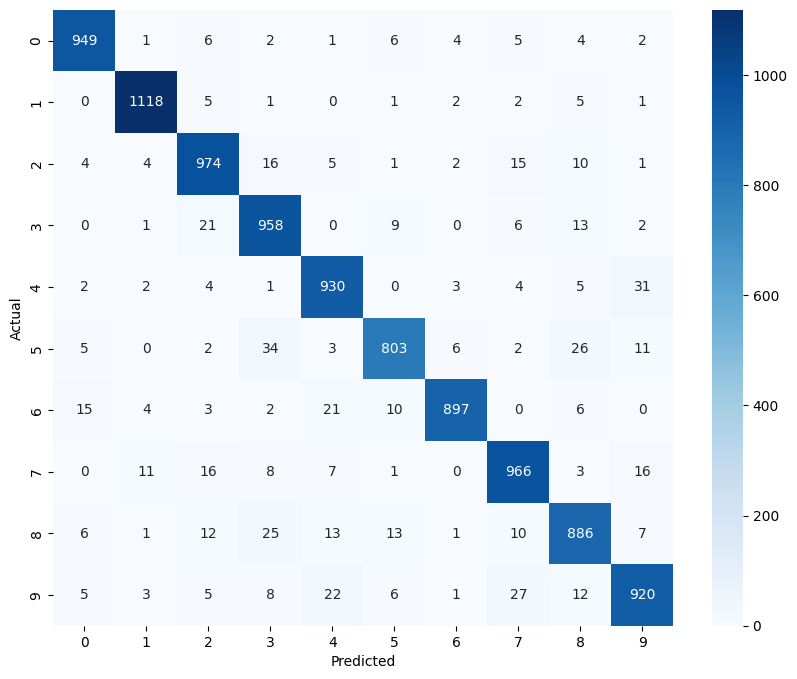

In [ ]:
# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Visualisasi Hasil Prediksi

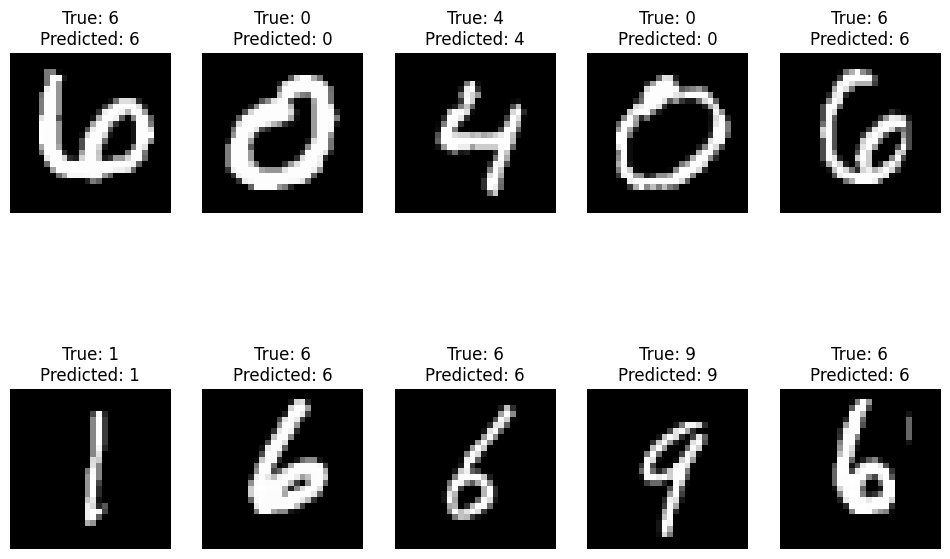

In [ ]:
# Select 10 random indices from the test set
random_indices = np.random.choice(x_test.shape[0], 10, replace=False)

# Get the original images, true labels, and predicted labels
original_images = x_test[random_indices]
true_labels = y_test[random_indices]
predicted_labels = np.argmax(predictions, axis=1)

# Create a grid of 10 images with their true labels and predicted labels
plt.figure(figsize=(12, 8))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(original_images[i], cmap='gray')
    plt.title(f"True: {true_labels[i]}\nPredicted: {predicted_labels[random_indices[i]]}")
    plt.axis('off')
plt.show()